In [3]:
import pandas as pd

In [4]:
dados = pd.read_csv('emp_automovel.csv')
dados

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54025 entries, 0 to 54024
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   receita_cliente      54025 non-null  float64
 1   anuidade_emprestimo  54025 non-null  float64
 2   anos_casa_propria    54025 non-null  float64
 3   telefone_trab        54025 non-null  int64  
 4   avaliacao_cidade     54025 non-null  float64
 5   score_1              54025 non-null  float64
 6   score_2              54025 non-null  float64
 7   score_3              54025 non-null  float64
 8   score_social         54025 non-null  float64
 9   troca_telefone       54025 non-null  float64
 10  inadimplente         54025 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 4.5 MB


In [6]:
x = dados.drop('inadimplente', axis = 1)
y = dados['inadimplente']

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
modelo = DecisionTreeClassifier()
modelo.fit(x, y)
modelo.score(x, y)
print(f'Acurácia: {modelo.score(x,y)}')

Acurácia: 1.0


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state = 5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

In [11]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)
print(f'Acurácia modelo treino: {modelo.score(x_treino, y_treino)}')
print(f'Acuracia modelo validação: {modelo.score(x_val, y_val)}')

Acurácia modelo treino: 1.0
Acuracia modelo validação: 0.8492291612228899


In [12]:
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_treino, y_treino)
print(f'Acurácia modelo treino: {modelo.score(x_treino, y_treino)}')
print(f'Acuracia modelo validação: {modelo.score(x_val, y_val)}')

Acurácia modelo treino: 0.9205865272938444
Acuracia modelo validação: 0.9059315390645414


In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)                                   

[[10360   119]
 [  961    41]]


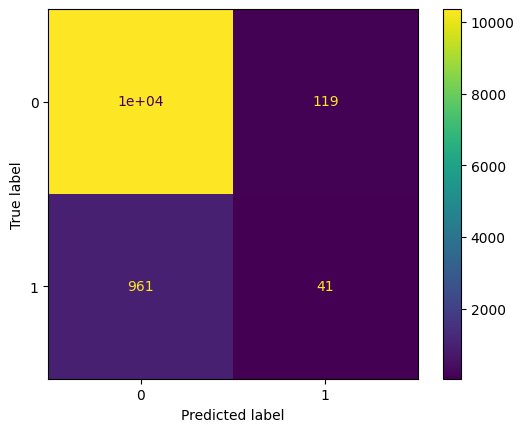

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao)
visualizacao.plot();

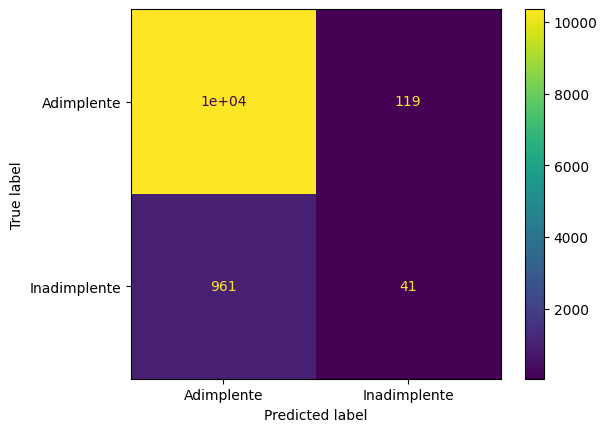

In [16]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Adimplente', 'Inadimplente'])
visualizacao.plot();

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
print(f'Acurácia: {accuracy_score(y_val, y_previsto)}')

Acurácia: 0.9059315390645414


In [19]:
from sklearn.metrics import precision_score, recall_score

In [20]:
print(f'Precisão: {precision_score(y_val, y_previsto)}')
print(f'Recall: {recall_score(y_val, y_previsto)}')

Precisão: 0.25625
Recall: 0.04091816367265469


In [21]:
from sklearn.metrics import f1_score

In [22]:
print(f'F1-Score: {f1_score(y_val, y_previsto)}')

F1-Score: 0.07056798623063683


In [23]:
from sklearn.metrics import RocCurveDisplay

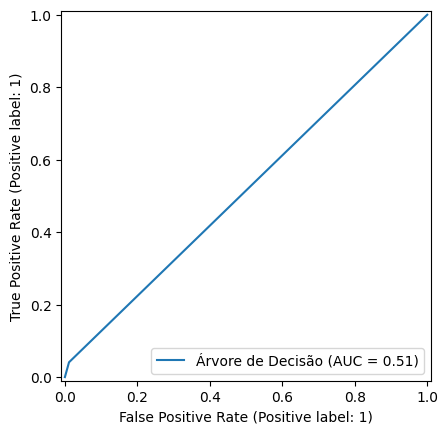

In [24]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de Decisão')

In [25]:
from sklearn.metrics import roc_auc_score

In [26]:
print(f'AUC: {roc_auc_score(y_val, y_previsto)}')

AUC: 0.5147810591242366


In [27]:
from sklearn.metrics import PrecisionRecallDisplay

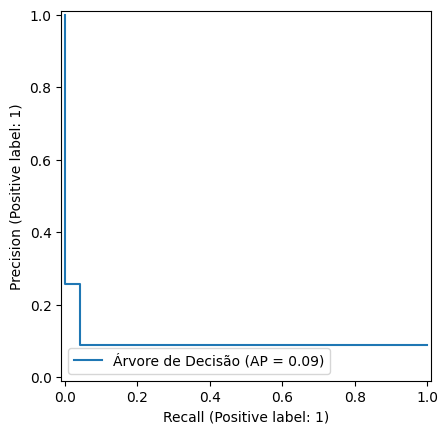

In [28]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de Decisão')

In [31]:
from sklearn.metrics import average_precision_score

In [32]:
print(f'Average precision: {average_precision_score(y_val, y_previsto)}')

Average precision: 0.09418878958831749


In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.26      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.59      0.51      0.51     11481
weighted avg       0.86      0.91      0.87     11481



In [37]:
from sklearn.model_selection import cross_validate, KFold

In [38]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, x, y, cv = kf)
cv_resultados

{'fit_time': array([0.32532454, 0.21553326, 0.20932794, 0.3548727 , 0.20744681]),
 'score_time': array([0.01791954, 0.00400329, 0.00448966, 0.00501418, 0.00300741]),
 'test_score': array([0.91257485, 0.90744774, 0.90799216, 0.91365418, 0.89906359])}

In [39]:
cv_resultados['test_score']

array([0.91257485, 0.90744774, 0.90799216, 0.91365418, 0.89906359])

In [40]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confiança: [{media -2*desvio_padrao}, {min(media + 2*desvio_padrao,1)}]')

Intervalo de confiança: [0.8978331639783443, 0.9184598423435066]


In [41]:
def intervalo_conf(resultados):
    media = resultados['test_score'].mean()
    desvio_padrao = resultados['test_score'].std()
    print(f'Intervalo de confiança: [{media -2*desvio_padrao}, {min(media + 2*desvio_padrao,1)}]')

In [42]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, x, y, cv = kf, scoring = 'recall')
cv_resultados

{'fit_time': array([0.24292469, 0.18747902, 0.19710708, 0.19694901, 0.25970626]),
 'score_time': array([0.01514649, 0.00601411, 0.00500059, 0.00719428, 0.02014899]),
 'test_score': array([0.02642008, 0.01980198, 0.0196802 , 0.01305483, 0.02312139])}

In [43]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.011539960031310338, 0.029291429500957207]


In [44]:
dados['inadimplente'].value_counts(normalize=True)

inadimplente
0    0.912707
1    0.087293
Name: proportion, dtype: float64

In [45]:
from sklearn.model_selection import StratifiedKFold

In [46]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, x, y, cv=skf, scoring='recall')

In [47]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.020289931006431516, 0.0385778807376166]


### Balanceamento dos Dados

In [50]:
%pip install imbalanced-learn

   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.0 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.0 kB 435.7 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/258.0 kB 279.3 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/258.0 kB 279.3 kB/s eta 0:00:01
   ---------- ---------------------------- 71.7/258.0 kB 301.2 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/258.0 kB 308.0 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/258.0 kB 308.0 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/258.0 kB 327.4 kB/s eta 0:00:01
   ----------


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\Luiz Felix\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [51]:
from imblearn.over_sampling import SMOTE

In [52]:
oversample = SMOTE()
x_balanceamento, y_balanceamento = oversample.fit_resample(x, y)

In [53]:
y_balanceamento, y_balanceamento.value_counts(normalize=True)

(0        0
 1        0
 2        0
 3        0
 4        1
         ..
 83819    1
 83820    1
 83821    1
 83822    1
 83823    1
 Name: inadimplente, Length: 83824, dtype: int64,
 inadimplente
 0    0.5
 1    0.5
 Name: proportion, dtype: float64)

In [54]:
modelo = DecisionTreeClassifier(max_depth=10)
skt = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, x_balanceamento, y_balanceamento, cv = skf,  scoring = 'recall')

In [55]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.6830781072075283, 0.7540261743239356]


### Pipeline para Validação

In [56]:
from imblearn.pipeline import Pipeline as imbpipeline

In [57]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('oversample', SMOTE()), ('árvore', modelo)])

In [58]:
skt = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, x, y, cv = skf,  scoring = 'recall')

In [59]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.19572740015763246, 0.3101371519452564]


### Undersampling

In [60]:
from imblearn.under_sampling import NearMiss

In [61]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('árvore', modelo)])
skt = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, x, y, cv = skf,  scoring = 'recall')

In [62]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.6270619123233326, 0.6964457978021029]


### Testando o Modelo

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



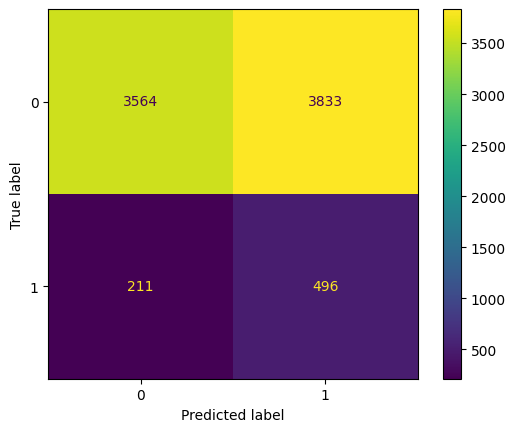

In [63]:
undersample = NearMiss(version=3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)

modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(x_teste)

print(classification_report(y_teste, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto)